<a href="https://colab.research.google.com/github/Numanur/data-science-ml/blob/main/basic_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**Gradient Decent**

Gradient decent is an algorithm that finds the best fit line for the given dataset.

A cost function is a mathematical formula used in machine learning and deep learning to measure how well a model is performing. It evaluates the difference between the predicted values and the actual (true) values from the dataset.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

where, we can replace the $\hat{y}_i$ with its equation.

$$\hat{y}_i = m*x_i + b$$
$\hat{y}_i$ is the predicted value by the regression model.

In [ ]:
def gradient_decent(x, y):
  m_curr = b_curr = 9
  iterations = 2000
  n = len(x)
  learning_rate = 0.065
  for i in range(iterations):
    y_predicted = m_curr*x + b_curr
    mse = (1/n)*sum([val**2 for val in (y - y_predicted)])
    dm = -(2/n)*sum(x*(y - y_predicted))
    db = -(2/n)*sum(y - y_predicted)
    m_curr = m_curr - learning_rate*dm
    b_curr = b_curr - learning_rate*db
    print(f"m = {m_curr} b={b_curr} cost={mse} iteration={i}")

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
gradient_decent(x, y)


m = -3.3499999999999996 b=5.49 cost=827.0 iteration=0
m = 3.3293999999999997 b=7.2528 cost=241.11859999999993 iteration=1
m = -0.23023400000000027 b=6.18147 cost=71.44868971999999 iteration=2
m = 1.7182273200000004 b=6.63767016 cost=22.26259661933601 iteration=3
m = 0.7024708900000001 b=6.274664384399999 cost=7.956022048457261 iteration=4
m = 1.2808184073840003 b=6.354994367328 cost=3.7489923492937645 iteration=5
m = 1.0008002815669597 b=6.1993259206956 cost=2.468329845661194 iteration=6
m = 1.1819187698549232 b=6.173101441194057 cost=2.0374938425106595 iteration=7
m = 1.1142653668967006 b=6.07964993359541 cost=1.855270264057403 iteration=8
m = 1.1798024181322089 b=6.024731949138293 cost=1.7475123324408282 iteration=9
m = 1.1730395000392158 b=5.951393852678754 cost=1.6637011875685577 iteration=10
m = 1.2045494124384233 b=5.890227246815222 cost=1.5891092111247853 iteration=11
m = 1.2148551263935414 b=5.824723433878258 cost=1.5193737780118524 iteration=12
m = 1.2359701564382566 b=5.76371

**Here after 1520 iterations, I am getting the same cost. So here it converges.**

#**Logistic Regression**
Logistic regression is used to predict the category or class. It can be `binary` classification such as `Yes/No` or `True/False` or `0/1` value.
It uses a threeshold to predict the class.
By default, the threshold is usually 0.5:

$\hat{y} \geq 0.5 → class=1 (positive)$

$\hat{y} < 0.5 → class=0 (negative)$

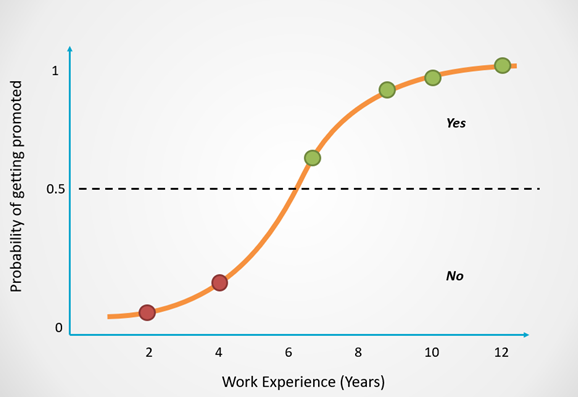

In [ ]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Colab Datasets/images/logistic.png'))


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/insurance_data.csv")
df.head()

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

<Axes: xlabel='age', ylabel='bought_insurance'>

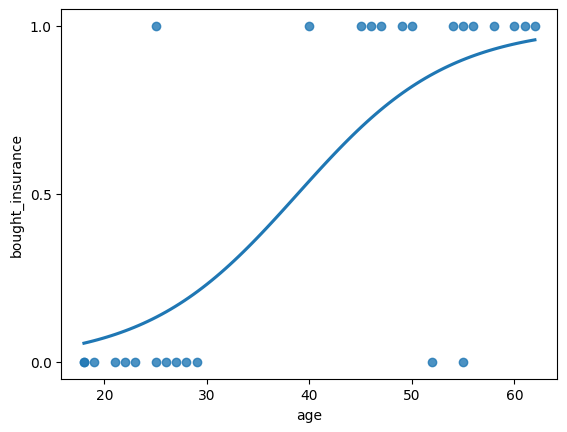

In [ ]:
plt.yticks([0, 0.5, 1])
sns.regplot(df, x="age", y="bought_insurance",logistic=True, ci=None)

In [ ]:
np.random.seed(1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["age"]], df["bought_insurance"], test_size=0.1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([1, 1, 0])

In [ ]:
new_value = pd.DataFrame([[35]], columns=["age"])
new_pred = model.predict(new_value)
print(f"Output is(0 or 1): {new_pred[0]}")

Output is(0 or 1): 0


In [ ]:
new_value = pd.DataFrame([[41]], columns=["age"])
new_pred = model.predict(new_value)
print(f"Output is(0 or 1): {new_pred[0]}")

Output is(0 or 1): 1


In [ ]:
y_test

17    1
14    1
18    0
Name: bought_insurance, dtype: int64

In [ ]:
model.predict(X_test)

array([1, 1, 0])

In [ ]:
model.score(X_test, y_test)

1.0

**Find the Coefficient and Intercept for the dataset**

In [ ]:
model.coef_

array([[0.12627793]])

In [ ]:
model.intercept_

array([-4.97335871])

#Let's implement sigmoid function to calculate the output

In [ ]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
def predict_function(age):
  y = 0.126*age - 4.97
  z = sigmoid(y)
  return z

In [ ]:
age = 35
predict_function(age)

0.3635474597184338

**Which means person of age 35 will not buy insurance**

In [ ]:
age = 41
predict_function(age)

0.5488437349470519

**This age will buy insurance.**

#**Student Habits Performace Classification**

In [145]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/student_habits_performance.csv")
df.head()

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

#Machine learning model needs to get the categorical data into numerical format. So We have to apply preprocessing on the dataset.

1. Drop student_id because it has no use in machine learning.

In [146]:
df = df.drop('student_id', axis=1)
df.head()

age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23  Female                  0.0                 1.2            1.1   
1   20  Female                  6.9                 2.8            2.3   
2   21    Male                  1.4                 3.1            1.3   
3   23  Female                  1.0                 3.9            1.0   
4   19  Female                  5.0                 4.4            0.5   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   85.0          8.0         Fair   
1            No                   97.3          4.6         Good   
2            No                   94.8          8.0         Poor   
3            No                   71.0          9.2         Poor   
4            No                   90.9          4.9         Fair   

   exercise_frequency parental_education_level internet_quality  \
0                   6                   Master          Average   
1                   6              High School          Average   
2                   1              High School             Poor   
3                   4                   Master             Good   
4                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

2. As 'gender' has three categories: Male, Female, Other. So we will apply One-hot-encoding on this data.

In [147]:
df = pd.get_dummies(df, columns=['gender'])


In [148]:
df.head()

age  study_hours_per_day  social_media_hours  netflix_hours part_time_job  \
0   23                  0.0                 1.2            1.1            No   
1   20                  6.9                 2.8            2.3            No   
2   21                  1.4                 3.1            1.3            No   
3   23                  1.0                 3.9            1.0            No   
4   19                  5.0                 4.4            0.5            No   

   attendance_percentage  sleep_hours diet_quality  exercise_frequency  \
0                   85.0          8.0         Fair                   6   
1                   97.3          4.6         Good                   6   
2                   94.8          8.0         Poor                   1   
3                   71.0          9.2         Poor                   4   
4                   90.9          4.9         Fair                   3   

  parental_education_level internet_quality  mental_health_rating  \
0                   Master          Average                     8   
1              High School          Average                     8   
2              High School             Poor                     1   
3                   Master             Good                     1   
4                   Master             Good                     1   

  extracurricular_participation  exam_score  gender_Female  gender_Male  \
0                           Yes        56.2           True        False   
1                            No       100.0           True        False   
2                            No        34.3          False         True   
3                           Yes        26.8           True        False   
4                            No        66.4           True        False   

   gender_Other  
0         False  
1         False  
2         False  
3         False  
4         False

In [149]:
df['gender_Female'] = df['gender_Female'].map({True: 1, False: 0})
df['gender_Male'] = df['gender_Male'].map({True: 1, False: 0})
df['gender_Other'] = df['gender_Other'].map({True: 1, False: 0})

3. Mapping True,False or Yes,No to 1 and 0.

In [150]:
df["extracurricular_participation"] = df["extracurricular_participation"].map({'Yes': 1, 'No': 0})

In [151]:
df["part_time_job"] = df["part_time_job"].map({'Yes': 1, 'No': 0})

In [152]:
df = pd.get_dummies(df, columns=['diet_quality'])

In [153]:
df['diet_quality_Fair'] = df['diet_quality_Fair'].map({True: 1, False: 0})
df['diet_quality_Good'] = df['diet_quality_Good'].map({True: 1, False: 0})
df['diet_quality_Poor'] = df['diet_quality_Poor'].map({True: 1, False: 0})

In [154]:
df = pd.get_dummies(df, columns=['parental_education_level'])

In [155]:
df['parental_education_level_Bachelor'] = df['parental_education_level_Bachelor'].map({True: 1, False: 0})
df['parental_education_level_High School'] = df['parental_education_level_High School'].map({True: 1, False: 0})
df['parental_education_level_Master'] = df['parental_education_level_Master'].map({True: 1, False: 0})

In [156]:
df = pd.get_dummies(df, columns=['internet_quality'])

In [157]:
df['internet_quality_Average'] = df['internet_quality_Average'].map({True: 1, False: 0})
df['internet_quality_Good'] = df['internet_quality_Good'].map({True: 1, False: 0})
df['internet_quality_Poor'] = df['internet_quality_Poor'].map({True: 1, False: 0})

In [158]:
df.to_csv("preprocessed_student_data.csv", index=False)

In [159]:
from google.colab import files
files.download('preprocessed_student_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [160]:
df.head()

age  study_hours_per_day  social_media_hours  netflix_hours  part_time_job  \
0   23                  0.0                 1.2            1.1              0   
1   20                  6.9                 2.8            2.3              0   
2   21                  1.4                 3.1            1.3              0   
3   23                  1.0                 3.9            1.0              0   
4   19                  5.0                 4.4            0.5              0   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  extracurricular_participation  ...  gender_Other  \
0                     8                              1  ...             0   
1                     8                              0  ...             0   
2                     1                              0  ...             0   
3                     1                              1  ...             0   
4                     1                              0  ...             0   

   diet_quality_Fair  diet_quality_Good  diet_quality_Poor  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                  0                  1   
4                  1                  0                  0   

   parental_education_level_Bachelor  parental_education_level_High School  \
0                                  0                                     0   
1                                  0                                     1   
2                                  0                                     1   
3                                  0                                     0   
4                                  0                                     0   

   parental_education_level_Master  internet_quality_Average  \
0                                1                         1   
1                                0                         1   
2                                0                         0   
3                                1                         0   
4                                1                         0   

   internet_quality_Good  internet_quality_Poor  
0                      0                      0  
1                      0                      0  
2                      0                      1  
3                      1                      0  
4                      1                      0  

[5 rows x 23 columns]

#As our basic preprocessing is completed, we will try to build machine learning model.

In [161]:
df = pd.read_csv("/content/preprocessed_student_data.csv")
df.head()

age  study_hours_per_day  social_media_hours  netflix_hours  part_time_job  \
0   23                  0.0                 1.2            1.1              0   
1   20                  6.9                 2.8            2.3              0   
2   21                  1.4                 3.1            1.3              0   
3   23                  1.0                 3.9            1.0              0   
4   19                  5.0                 4.4            0.5              0   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  extracurricular_participation  ...  gender_Other  \
0                     8                              1  ...             0   
1                     8                              0  ...             0   
2                     1                              0  ...             0   
3                     1                              1  ...             0   
4                     1                              0  ...             0   

   diet_quality_Fair  diet_quality_Good  diet_quality_Poor  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                  0                  1   
4                  1                  0                  0   

   parental_education_level_Bachelor  parental_education_level_High School  \
0                                  0                                     0   
1                                  0                                     1   
2                                  0                                     1   
3                                  0                                     0   
4                                  0                                     0   

   parental_education_level_Master  internet_quality_Average  \
0                                1                         1   
1                                0                         1   
2                                0                         0   
3                                1                         0   
4                                1                         0   

   internet_quality_Good  internet_quality_Poor  
0                      0                      0  
1                      0                      0  
2                      0                      1  
3                      1                      0  
4                      1                      0  

[5 rows x 23 columns]

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = df.drop("mental_health_rating", axis=1)
y = df["mental_health_rating"]

model = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.145
[[4 6 2 3 1 2 0 0 1 1]
 [3 3 6 1 1 0 0 4 0 1]
 [0 2 6 3 5 2 3 0 0 0]
 [5 3 3 3 1 3 2 0 1 1]
 [1 1 1 3 3 3 0 2 2 4]
 [4 5 4 2 2 1 1 1 0 2]
 [2 1 3 2 1 2 0 2 3 2]
 [3 0 3 0 4 1 4 2 1 3]
 [1 3 0 0 2 1 1 4 3 2]
 [1 0 1 3 1 1 2 5 2 4]]


# **Applying K-Fold Cross Vallidation**

In [163]:
KF = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(model, X, y, cv=KF)
print(scores)

[0.13 0.12 0.07 0.14 0.18 0.12 0.12 0.12 0.1  0.1 ]


In [164]:
mean_score = scores.mean()
print(mean_score)

0.12000000000000002


In [165]:
df['mental_health_rating'].value_counts(normalize=True)


mental_health_rating
4     0.110
6     0.108
3     0.105
8     0.105
1     0.102
10    0.099
5     0.099
2     0.094
7     0.091
9     0.087
Name: proportion, dtype: float64

In [166]:
model.feature_importances_

array([0.0714172 , 0.10373248, 0.09690884, 0.0934432 , 0.01953332,
       0.1005935 , 0.0949938 , 0.0629451 , 0.02383017, 0.11562654,
       0.02082996, 0.02113685, 0.00679634, 0.01971196, 0.02056913,
       0.01660176, 0.02057314, 0.02146807, 0.01478634, 0.02081565,
       0.01902167, 0.01466498])

#**Let's perform feature importance**

In [167]:
feature_importances = model.feature_importances_
features = X_train.columns  # your feature names

feat_imp_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)
print(feat_imp_df)


                                 feature  importance
9                             exam_score    0.115627
1                    study_hours_per_day    0.103732
5                  attendance_percentage    0.100594
2                     social_media_hours    0.096909
6                            sleep_hours    0.094994
3                          netflix_hours    0.093443
0                                    age    0.071417
7                     exercise_frequency    0.062945
8          extracurricular_participation    0.023830
17  parental_education_level_High School    0.021468
11                           gender_Male    0.021137
10                         gender_Female    0.020830
19              internet_quality_Average    0.020816
16     parental_education_level_Bachelor    0.020573
14                     diet_quality_Good    0.020569
13                     diet_quality_Fair    0.019712
4                          part_time_job    0.019533
20                 internet_quality_Good    0.

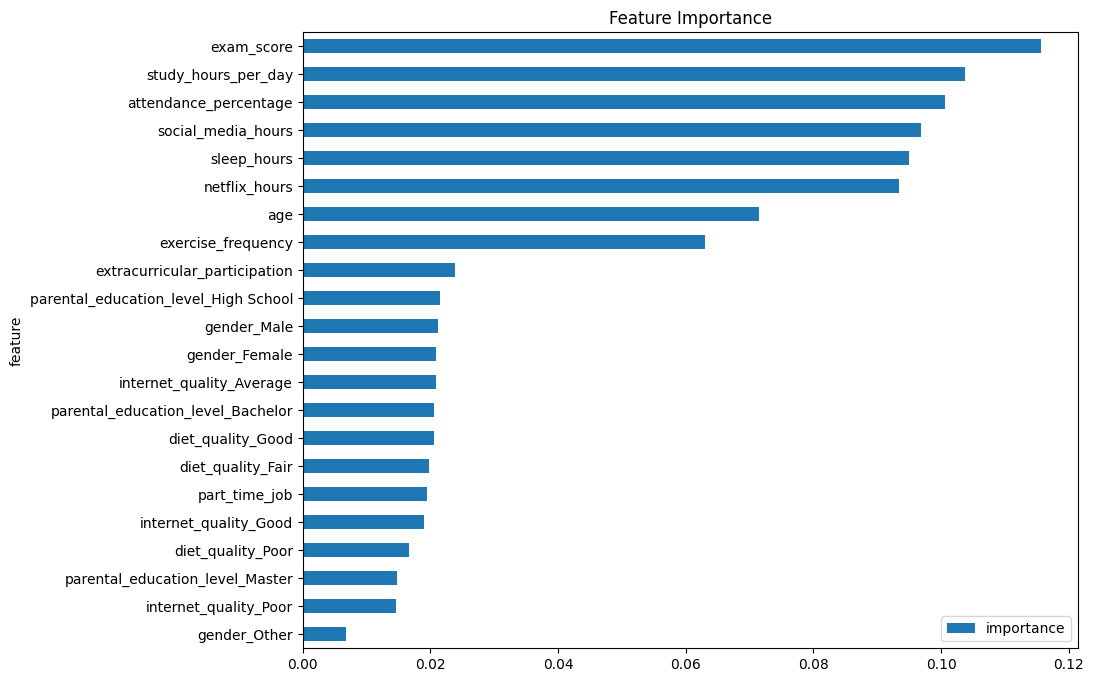

In [168]:
feat_imp_df.sort_values(by='importance', ascending=True).plot.barh(x='feature', y='importance', figsize=(10,8))
plt.title('Feature Importance')
plt.show()


#**Now modify the dataset**

In [169]:
important_features = [
    'exam_score',
    'study_hours_per_day',
    'attendance_percentage',
    'social_media_hours',
    'netflix_hours',
    'sleep_hours',
    'age',
    'exercise_frequency',
    'extracurricular_participation'
]

df_reduced = df[important_features + ['mental_health_rating']]


In [170]:
X = df_reduced.drop('mental_health_rating', axis=1)
y = df_reduced['mental_health_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [172]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.16
